# Name: Farel Arden

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers, optimizers
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2021-09-13 13:58:10.013990: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data=pd.read_csv("../input/digit-recognizer/train.csv")
test_data=pd.read_csv("../input/digit-recognizer/test.csv")
sample_submission=pd.read_csv("../input/digit-recognizer/sample_submission.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

In [5]:
train_data.isnull().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [6]:
y = train_data["label"]
x = train_data.drop(labels = ["label"],axis = 1) 

In [7]:
x = x.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [8]:
x = x / 255.0
x_test = test_data / 255.0

In [9]:
y = to_categorical(y, num_classes=10)

In [10]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nThe accuracy has reached 99%!")
      self.model.stop_training = True
callbacks = myCallback()

## Training and Building the model

In [11]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
# model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
# model.add(Flatten())
# model.add(Dense(128, activation="relu"))
# model.add(Dense(10, activation="softmax"))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

2021-09-13 13:58:19.975838: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-13 13:58:19.979165: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-13 13:58:20.019321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 13:58:20.019943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-13 13:58:20.020012: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-13 13:58:20.042510: I tensorflow/stream_executor/platform/def

In [13]:
x.shape

(42000, 28, 28, 1)

In [14]:
y.shape

(42000, 10)

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

In [16]:
x_train.shape

(33600, 28, 28, 1)

In [17]:
y_train.shape

(33600, 10)

In [18]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_valid, y_valid), verbose=2, callbacks=[callbacks],batch_size=32)

2021-09-13 13:58:22.806190: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-13 13:58:22.816946: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000185000 Hz


Epoch 1/10


2021-09-13 13:58:23.278351: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-13 13:58:24.034832: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-13 13:58:24.045534: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


1050/1050 - 9s - loss: 0.1462 - accuracy: 0.9550 - val_loss: 0.0677 - val_accuracy: 0.9792
Epoch 2/10
1050/1050 - 2s - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0625 - val_accuracy: 0.9829

The accuracy has reached 99%!


## Ploting the val accuracy and the accuracy of the model

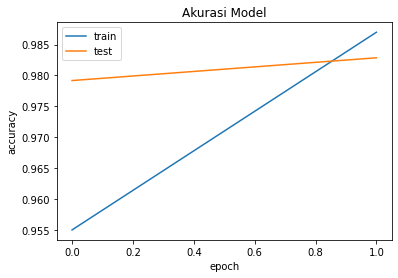

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

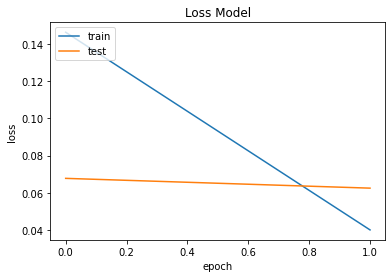

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## TF-Lite formatting

In [21]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

2021-09-13 13:58:35.762424: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2021-09-13 13:58:36.439915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 13:58:36.440326: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2021-09-13 13:58:36.440457: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-09-13 13:58:36.440746: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-13 13:58:36.440959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node 

In [22]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)